In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df: pd.DataFrame = pd.read_csv('../../output/EndPointFBA/fva_n45_dt01.csv')
df.rename(columns={df.columns[0]: 'rid'}, inplace=True)


,rid,OptimalSolution,ReducedCosts,MinValue,MaxValue,Span,MinStatus,MaxStstus
0,R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_time00,0.000000,0.0,0.0,0.000502,0.000502,1.0,1.0
1,R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_time01,0.000089,0.0,0.0,0.001003,0.001003,1.0,1.0
2,R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_time02,0.000489,0.0,0.0,0.001505,0.001505,1.0,1.0
3,R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_time03,0.000000,0.0,0.0,0.002006,0.002006,1.0,1.0
4,R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_time04,0.000165,0.0,0.0,0.002508,0.002508,1.0,1.0


In [32]:
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]

time_ids = [f"R_LYStex_dleu_{tid}" for tid in times]

filtered_df = df[df['rid'].isin(time_ids)]


print(df.loc[df['rid'] == "R_LYStex_dleu_time00", 'OptimalSolution'].values[0])


0.0


In [29]:
y1 = filtered_df['MinValue'].tolist()
y2 = filtered_df['MaxValue'].tolist()
y0 = filtered_df['OptimalSolution'].tolist()

print(y0)

[0.0, -0.0001312396023757, 0.0, -0.0001254649176127, 0.0, -0.000278336289209, 0.0, 0.0, -0.0001876961858094, 0.0, 0.0, -0.0002440984970676, 0.0, -0.0005406926150247, 0.0, 0.0, 0.0, -0.0006752414696142, 0.0, -0.0003456513585007, -7.864272622201498e-05, -0.0002699387817706, -0.0001320023922788, 0.0, -0.0007208057383894, -0.0008057164880246, -0.0008172848490024, -4.962841184408892e-05, 0.0, -0.0011603128066174, -0.0005937459297289, -0.0006782245323628, 0.0, -0.001224701876649, -0.0012822589226186, 0.0, 0.0, -0.0006511352386842, 0.0, 0.0, -0.0025552749130664, -0.0008001218721495, 0.0, 0.0, 0.0]


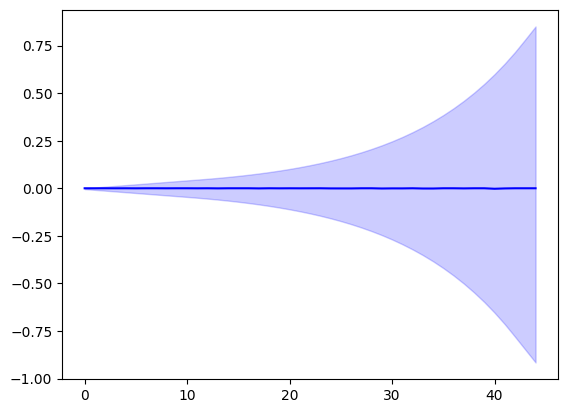

In [28]:
plt.plot(range(0,45), y0, label='Sample Line', color='blue')
plt.fill_between(range(0,45), y1,  y2, color='blue', alpha=0.2, label='Confidence Interval')

In [18]:
df[df['MinValue'] != 0]


,rid,OptimalSolution,ReducedCosts,MinValue,MaxValue,Span,MinStatus,MaxStstus
90,R_VALtex_dleu_time00,0.000000,0.0,-0.005400,0.000213,0.005613,1.0,1.0
91,R_VALtex_dleu_time01,0.000038,0.0,-0.010800,0.000425,0.011225,1.0,1.0
92,R_VALtex_dleu_time02,0.000207,0.0,-0.016200,0.000638,0.016838,1.0,1.0
93,R_VALtex_dleu_time03,0.000000,0.0,-0.021600,0.000850,0.022450,1.0,1.0
94,R_VALtex_dleu_time04,0.000070,0.0,-0.027000,0.001063,0.028063,1.0,1.0
...,...,...,...,...,...,...,...,...
310,R_LYStex_dleu_time40,-0.002555,0.0,-0.653830,0.599853,1.253683,1.0,1.0
311,R_LYStex_dleu_time41,-0.000800,0.0,-0.714548,0.655637,1.370185,1.0,1.0
312,R_LYStex_dleu_time42,0.000000,0.0,-0.780646,0.716437,1.497083,1.0,1.0
313,R_LYStex_dleu_time43,0.000000,0.0,-0.848162,0.782615,1.630777,1.0,1.0


In [63]:
def plot_fva(df,ids):
    times = [f"time{t:0{len(str(45))}d}" for t in range(45)]
    for i,rid in enumerate(ids):
        # for i, mid in enumerate(["dleu", "dlys"]):
        full_ids= [f"{rid}_{tid}" for tid in times]
        y0 = []
        y1=[]
        y2 = []
        for tid in full_ids:
            y0.append(df.loc[df['rid'] == tid, 'OptimalSolution'].values[0])
            y1.append(df.loc[df['rid'] == tid, 'MinValue'].values[0])
            y2.append( df.loc[df['rid'] == tid, 'MaxValue'].values[0])
        
        plt.plot(range(0,45), y0, label=f'Sample Line {rid}', color=f"C{i}")
        plt.fill_between(range(0,45), y1,  y2, color=f"C{i}", alpha=0.2, label='Confidence Interval')
    plt.legend()
    plt.show()

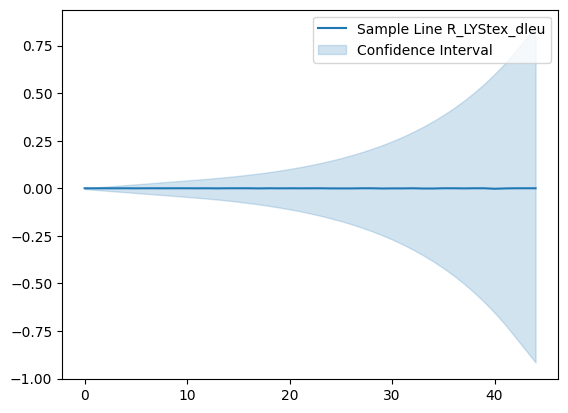

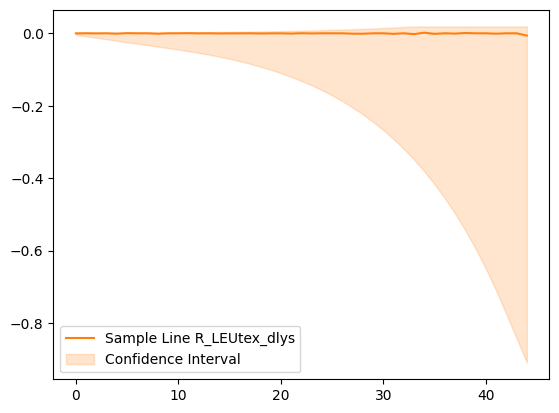

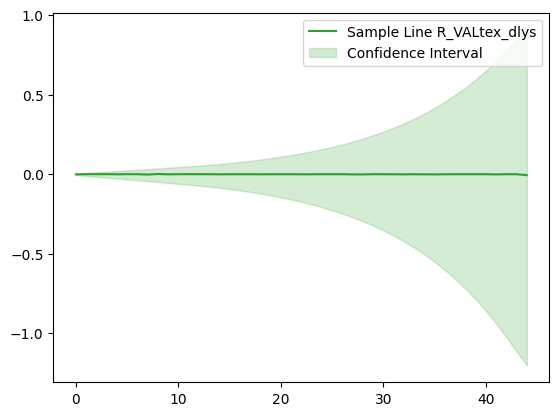

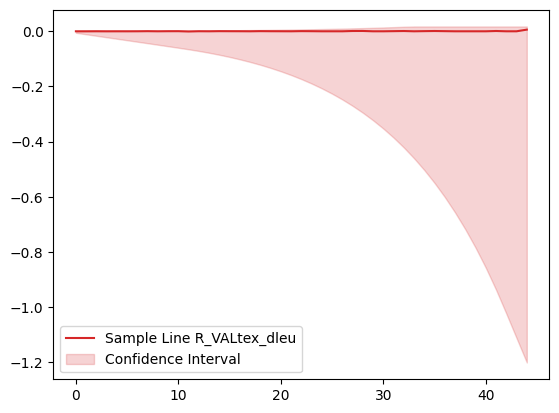

In [68]:
plot_fva(df, ["R_LYStex_dleu", "R_LEUtex_dlys", "R_VALtex_dlys" ,"R_VALtex_dleu"])